# Initializtion


Connect to Google Drive:

In [51]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [84]:
X_train = X_train_tfidf_L1
X_test = X_test_tfidf_L1

# Basic training

We define and train a model with default hyperparameter, which is alpha = 1:

In [85]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Evaluate model using preset function:

Score of on train are:
	- Accuracy score: 0.8143
	- Micro F1 score: 0.8143
	- Macro F1 score: 0.6320
Score of on test are:
	- Accuracy score: 0.6983
	- Micro F1 score: 0.6983
	- Macro F1 score: 0.4803


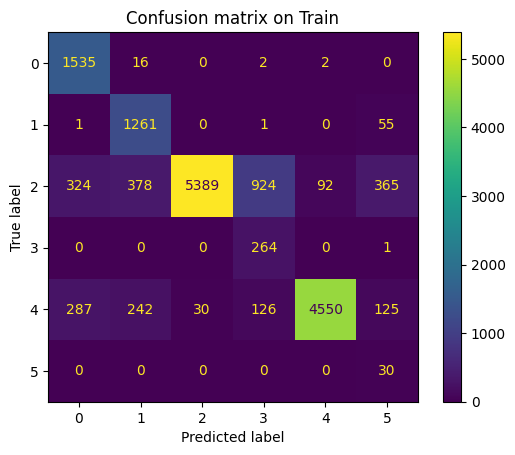

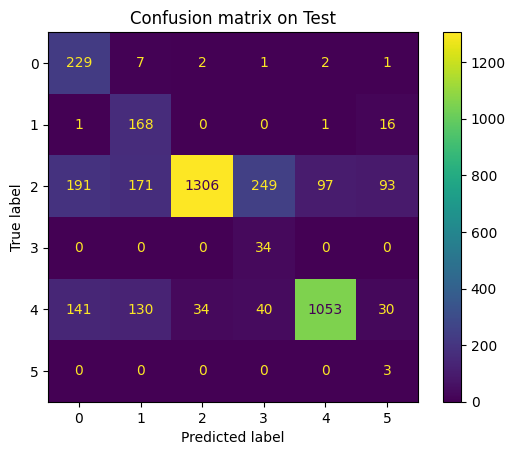

In [86]:
evaluate_model(nb_model, X_train, X_test, y_train, y_test, include_training=True)

Draw the learning curve using preset function:

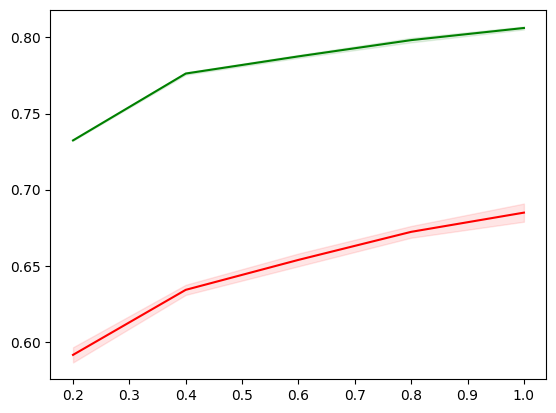

In [87]:
draw_learning_curve(nb_model, X_train, y_train)

# Model selection

## $\alpha$ parameter

First we try a hyperparameter range:

In [88]:
# Setting the hyperparameter range
K = [0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10]

In [89]:
# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for k in K:
  # Define model for each K
  nb_model = MultinomialNB(alpha=k)
  nb_model.fit(X_train, y_train)

  # Calculate score of cross validation
  train_score = accuracy_score(y_train, nb_model.predict(X_train))
  cv_score = np.mean(cross_val_score(nb_model, X_train, y_train, cv=5, n_jobs=8))

  trs_list.append(train_score)
  cvs_list.append(cv_score)

[0.0001, 0.001, 0.001, 0.01, 0.1, 1, 10]
[0.9895, 0.9895, 0.9895, 0.9889375, 0.9829375, 0.8143125, 0.6070625]
[0.7001875, 0.7039375000000001, 0.7039375000000001, 0.736, 0.806, 0.6848750000000001, 0.5668124999999999]


[Text(0, 0, '0.0001'),
 Text(1, 0, '0.001'),
 Text(2, 0, '0.001'),
 Text(3, 0, '0.01'),
 Text(4, 0, '0.1'),
 Text(5, 0, '1'),
 Text(6, 0, '10')]

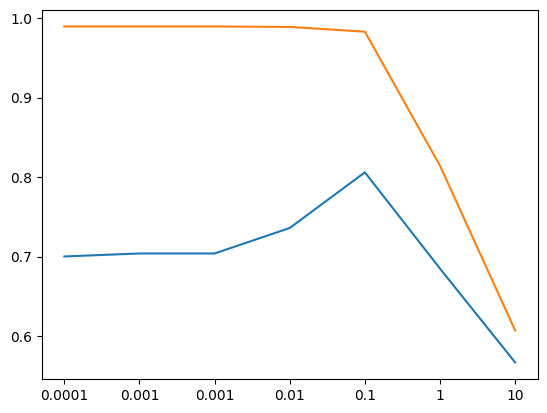

In [90]:
# Print the result
print(K)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(K))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(K))), y=trs_list)
fig.set_xticks(range(len(K)))
fig.set_xticklabels(K)

From the result of above section, we can see the good value of $\alpha$ is near the value 0.1.

Scope to $\alpha$ = 0.1.

In [91]:
# Setting the hyperparameter range
K = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]

In [92]:
# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for k in K:
  # Define model for each K
  nb_model = MultinomialNB(alpha=k)
  nb_model.fit(X_train, y_train)

  # Calculate score of cross validation
  train_score = accuracy_score(y_train, nb_model.predict(X_train))
  cv_score = np.mean(cross_val_score(nb_model, X_train, y_train, cv=5, n_jobs=8))

  trs_list.append(train_score)
  cvs_list.append(cv_score)

[0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
[0.987125, 0.984875, 0.9829375, 0.9791875, 0.9754375, 0.97175, 0.9671875]
[0.8018749999999999, 0.806625, 0.806, 0.7994374999999999, 0.7899375, 0.7815625, 0.7734375]


[Text(0, 0, '0.05'),
 Text(1, 0, '0.075'),
 Text(2, 0, '0.1'),
 Text(3, 0, '0.125'),
 Text(4, 0, '0.15'),
 Text(5, 0, '0.175'),
 Text(6, 0, '0.2')]

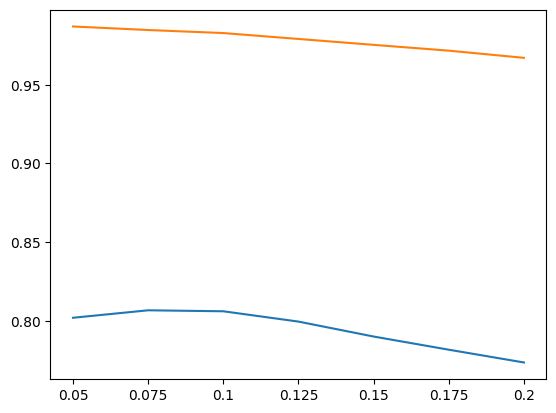

In [93]:
# Print the result
print(K)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(K))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(K))), y=trs_list)
fig.set_xticks(range(len(K)))
fig.set_xticklabels(K)

As the result, we can claim that $\alpha = 0.075$ give a model with good accuracy and avoid overfitting. We will test the model again in test set.

In [94]:
best_nb_model = MultinomialNB(alpha=0.075)

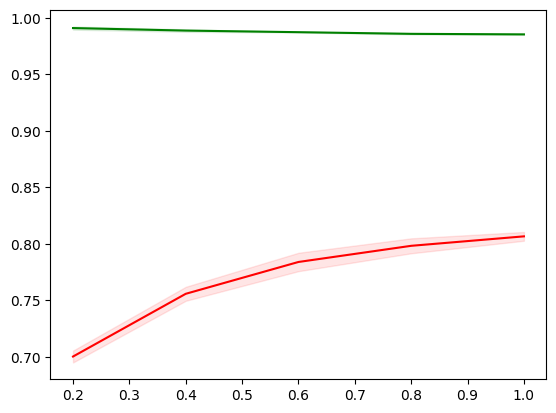

In [95]:
draw_learning_curve(best_nb_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.9849
	- Micro F1 score: 0.9849
	- Macro F1 score: 0.9784
Score of on test are:
	- Accuracy score: 0.8153
	- Micro F1 score: 0.8153
	- Macro F1 score: 0.7497


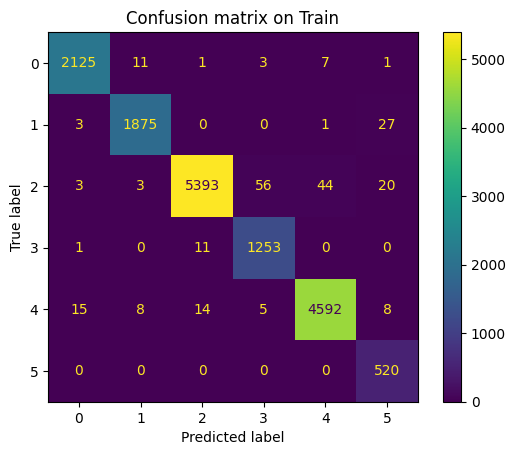

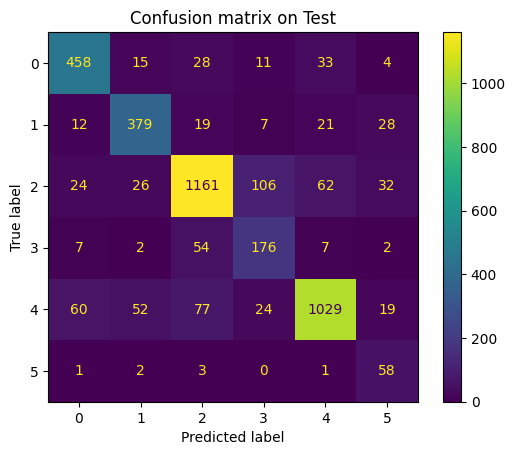

In [96]:
best_nb_model.fit(X_train, y_train)
evaluate_model(best_nb_model, X_train, X_test, y_train, y_test, include_training=True)

# Export model

In [97]:
directory = "data/models/nb/"

dump(best_nb_model, directory + "best_nb_tfidf_model.joblib")

['data/models/nb/best_nb_tfidf_model.joblib']